# CS210 Recitation 10:  Naive Bayes
*Monday, 24 April 2017*

## A Simple Example using Naive Bayes Classification

In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import GaussianNB
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# import some data to play with
iris = datasets.load_iris() # iris dictionary with two keys: data and target

In [3]:
X = iris.data # returns a numpy ndarray
y = iris.target # returns a numpy ndarray

In [4]:
class_names = iris.target_names
class_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [5]:
# create train and test partitions.
# train_test_split function returns 4 partitions:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.4, random_state=42) # random_state:optional

In [6]:
y_train

array([2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0,
       1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0,
       2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0,
       1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [7]:
# Apply CV, and see the averaged results:
clf = GaussianNB()

# fit the classifier on the training features and labels
clf.fit(X_train, y_train) 

# how well does the model work on the test set?
clf.score(X_test,y_test) # for a classification model, default scoring metric is the "accuracy"

0.96666666666666667

In [8]:
# Alternatively, you can calculate and return the accuracy by

# use the trained classifier to predict labels for the test features
pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print('accuracy: '+ str(accuracy))           

accuracy: 0.966666666667


In [9]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1])

In [10]:
pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1,
       1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1])

In [11]:
# Computing cross-validated accuracy metric: (more robust than computing accuracy according to only one test set)

scoresAcc= cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Accuracy values: "+ str(list(scoresAcc)))
print('Mean:%.2f' %scoresAcc.mean())


Accuracy values: [0.93333333333333335, 0.96666666666666667, 0.93333333333333335, 0.93333333333333335, 1.0]
Mean:0.95


In [12]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    Print and plot the confusion matrix. Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    np.set_printoptions(precision=2)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[23  0  0]
 [ 0 18  1]
 [ 0  1 17]]


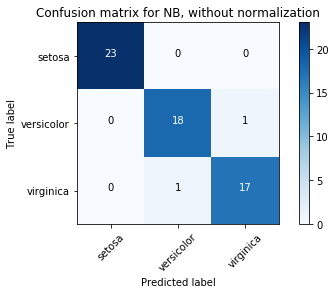

In [13]:
cnf_matrix = confusion_matrix(y_test, pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix for NB, without normalization')

In [14]:
# Now a SVM classifier (Support Vector Machine)

In [15]:
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

In [16]:
cnf_matrix = confusion_matrix(y_test, y_pred)

Confusion matrix, without normalization
[[23  0  0]
 [ 0 16  3]
 [ 0  0 18]]


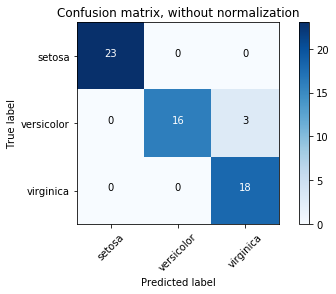

In [17]:
# Plot non-normalized confusion matrix for SVM
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')

Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.    0.84  0.16]
 [ 0.    0.    1.  ]]


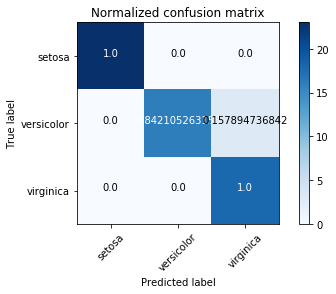

In [18]:
# Plot the normalized confusion matrix for SVM
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')

## A More Involved Example On Spam Detection: Real-world Filtering on Enron E-mails!

To demonstrate text classification with scikit-learn, we're going to build a simple spam filter.  This is a binary classification problem. There are two classes: **SPAM**, or **NOT SPAM** (*HAM*). However, our classifier will supports multi-class classification in case we want to include samples from more classes in the training set.

We're going to use a combination of the [Enron-Spam data sets](http://www2.aueb.gr/users/ion/data/enron-spam/) in raw form and the [SpamAssassin public corpus](http://spamassassin.apache.org/old/publiccorpus/). which are both are publicly available for download. We shall use to use these raw, labeled emails to build a model for a working, reasonable accurate spam filter.

### Loading raw email data into a workable format

We need to load example data in a format we can feed to the learning algorithm. scikit-learn typically likes things to be in a Numpy array-like structure. For a spam classifier, it would be useful to have a 2-dimensional array containing email bodies in one column and a class (also called a label), i.e. spam or ham, for the document in another.

Below is a function that will take a file path, iterate recursively through all files in said path or its subpaths, and yield each email body contained therein. This allows us to dump the example data into directories.

In [19]:
import os

NEWLINE = '\n'
SKIP_FILES = {'cmds'}

In [20]:
def read_files(path):
    for root, dir_names, file_names in os.walk(path):
        for path in dir_names:
            read_files(os.path.join(root, path))
        for file_name in file_names:
            if file_name not in SKIP_FILES:
                file_path = os.path.join(root, file_name)
                if os.path.isfile(file_path):
                    past_header, lines = False, []
                    f = open(file_path, encoding="latin-1")
                    for line in f:
                        if past_header:
                            lines.append(line)
                        elif line == NEWLINE:
                            past_header = True
                    f.close()
                    content = NEWLINE.join(lines)
                    yield file_path, content

The function below builds a DataFrame from all the files in path. It will include the body text in one column and the class in another. Each row will be indexed by the corresponding email's filename. Instead of just adding a new row to the DataFrame, we construct a new one and append it to the prior one repeatedly.

In [21]:

def build_data_frame(path, classification):
    rows = []
    index = []
    for file_name, text in read_files(path):
        rows.append({'text': text, 'class': classification})
        index.append(file_name)

    data_frame = pd.DataFrame(rows, index=index)
    return data_frame

Using read_files and build_data_frame, it's really easy for us to build and add to the dataset. One more thing we need is to use DataFrame's reindex to shuffle the whole dataset. Otherwise, we'd have contiguous blocks of examples from each source. This is important for validating prediction accuracy later.

In [22]:
HAM = 'ham'
SPAM = 'spam'

SOURCES = [
    ('data/spam',        SPAM),
    ('data/easy_ham',    HAM),
    ('data/hard_ham',    HAM),
    ('data/beck-s',      HAM),
    ('data/farmer-d',    HAM),
    ('data/kaminski-v',  HAM),
    ('data/kitchen-l',   HAM),
    ('data/lokay-m',     HAM),
    ('data/williams-w3', HAM),
    ('data/BG',          SPAM),
    ('data/GP',          SPAM),
    ('data/SH',          SPAM)
]


In [23]:
data = pd.DataFrame({'text': [], 'class': []})
for path, classification in SOURCES:
    data = data.append(build_data_frame(path, classification))

data = data.reindex(np.random.permutation(data.index))

In [24]:
data.tail()

class  \
data/BG/2004/08/1092866204.11388_205.txt            spam   
data/SH/HP/prodmsg.2.435813.2005630                 spam   
data/lokay-m/tw_commercial_group/13                  ham   
data/GP/part10/msg1798.eml                          spam   
data/easy_ham/01691.6057cf5e982869286b4742cee56...   ham   

                                                                                                 text  
data/BG/2004/08/1092866204.11388_205.txt            Sivarajah\n\n\n\nATTN;\n\n\n\npls contact me t...  
data/SH/HP/prodmsg.2.435813.2005630                 This is a multi-part message in MIME format.\n...  
data/lokay-m/tw_commercial_group/13                 Omaha Facility Planning has developed a hydrau...  
data/GP/part10/msg1798.eml                          <body>\n\n\n\n<div align=3D"center">\n\n  <cen...  
data/easy_ham/01691.6057cf5e982869286b4742cee56...  \n\n    Guido> Therefore I propose to nuke GBa...

### Extracting features from the raw data that an algorithm can learn from

Before we can train an algorithm to classify a document, we have to extract features from it. We'll produce a table of each word mentioned in the corpus (*the unioned collection of emails*) and its corresponding frequency for each class of email. A contrived visualization might look like this:

The code to do this using scikit-learn's **feature_extraction** module is pretty minimal. We first instantiate a **CountVectorizer** and then call its instance method **fit_transform**, which does two things: *Learns the vocabulary of the corpus*, and *Extracts word count features*. However, in some cases you may want to use a different vocabulary than the one inherent in the raw data. For this reason, CountVectorizer provides fit and transform methods to do them separately. Additionally, you can provide a vocabulary in the constructor.

To get the text from the DataFrame, we access it like a dictionary and it returns a vector of email bodies, and then use its values attribute to get the underlying Numpy array.

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
counts = count_vectorizer.fit_transform(data['text'].values)

### Training a classifier

We shall going to use a naive Bayes classifier to learn from the features. A naive Bayes classifier applies the Bayes theorem with naive independence assumptions where each feature (*in this case word counts*) is independent from every other one. A spammy word like "*Free*" contributes to the probability that an email containing it is spam. However, a non-spam email could also contain "Free" balanced out with non-spammy words like "*Linux*" and "*tomorrow*".

We instantiate a new **MultinomialNB** and train it by calling **fit**, passing in the feature vector and the target vector (*the classes that each example belongs to*).

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier   # SVM, can to try this later (not a subject of this course)

classifier = MultinomialNB()
targets = data['class'].values
classifier.fit(counts, targets)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

We now have a trained spam classifier! We can try it out by constructing some examples and predicting on them.

In [27]:
examples = ['Free Viagra call today!', "I'm going to attend the Linux users group tomorrow.",
            "I am free today."]
example_counts = count_vectorizer.transform(examples)
predictions = classifier.predict(example_counts)
predictions # [1, 0, 0]

array(['spam', 'ham', 'ham'],
      dtype='<U4')

A **pipeline**  connects a series of steps into one object which you train and then use to make predictions. We can use a pipeline to *merge* the **feature extraction** and **classification** into one operation:

In [28]:
from sklearn.pipeline import Pipeline

In [29]:
pipeline = Pipeline([ ('vectorizer',  CountVectorizer()), ('classifier',  MultinomialNB()) ])
pipeline.fit(data['text'].values, data['class'].values)
pipeline.predict(examples) # ['spam', 'ham', 'ham']

array(['spam', 'ham', 'ham'],
      dtype='<U4')

In [30]:
pipeline.predict_proba(examples) # col.0 is HAM, col.1 is SPAM

array([[  9.51e-03,   9.90e-01],
       [  1.00e+00,   7.64e-06],
       [  8.17e-01,   1.83e-01]])

### Evaluating accuracy by cross-validation

To validate the classifier against unseen data, we can just split the training set into two parts with a ratio of 1:4 or so. Given that the dataset has been shuffled, each portion should contain an equal distribution of example types. We hold out the smaller portion, train the classifier on the larger part, predict on the hold-out data, and compare the predictions to the examples' already-known classes. This method works but it has the disadvantage of your classifier not getting trained and validated on all examples in the data set.

A more sophisticated method is known as k-fold cross-validation. Using this method, we split the data set into k parts, hold out one, combine the others and train on them, then validate against the held-out portion. You repeat that process k times (each fold), holding out a different portion each time. Then you average the score measured for each fold to get a more accurate estimation of your model's performance.

We'll split the data set into 6 folds and cross-validate on them. **scikit-learn**'s **KFold** can be used to generate k pairs of index vectors. Each pair contains a list of indices to select a training subset of the data and a list of indices to select a validation subset of the data.

In [31]:
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix, f1_score

/home/tekno1/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
def crossValidate(pipe):
    k_fold = KFold(n=len(data), n_folds=6)
    scores = []
    confusion = np.array([[0, 0], [0, 0]])
    for train_indices, test_indices in k_fold:
        train_text = data.iloc[train_indices]['text'].values
        train_y = data.iloc[train_indices]['class'].values

        test_text = data.iloc[test_indices]['text'].values
        test_y = data.iloc[test_indices]['class'].values

        pipe.fit(train_text, train_y)
        predictions = pipe.predict(test_text)

        confusion += confusion_matrix(test_y, predictions)
        score = f1_score(test_y, predictions, pos_label=SPAM)
        scores.append(score)

    print('Total emails classified:', len(data))
    print('Score:', sum(scores)/len(scores))
    print('Confusion matrix:')
    print(confusion)
    return confusion

confuse1 = crossValidate(pipeline)

Total emails classified: 55326
Score: 0.942681952442
Confusion matrix:
[[21658   180]
 [ 3470 30018]]


In [33]:
confuse1

array([[21658,   180],
       [ 3470, 30018]])

In [34]:
accuracy1 = (confuse1.diagonal().sum()/confuse1.sum()) 
accuracy1   # 93% !..

0.93402740122184869

Confusion matrix, without normalization
[[21658   180]
 [ 3470 30018]]


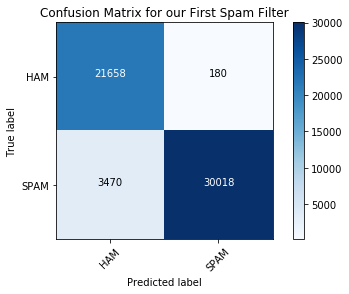

In [ ]:
plot_confusion_matrix(confuse1, classes=["HAM","SPAM"], title='Confusion Matrix for our First Spam Filter')

In [ ]:
# DO NOT RERUN during recitation, takes more than 10 minutes
pipe2 = Pipeline([ ('count_vectorizer', CountVectorizer(ngram_range=(1, 2))),
                  ('classifier',  MultinomialNB()) ])
confuse2 = crossValidate(pipe2)

In [ ]:
accuracy2 = (confuse2.diagonal().sum()/confuse2.sum()) 
accuracy2  # 97% !!!

In [ ]:
plot_confusion_matrix(confuse2, classes=["HAM","SPAM"], title='Confusion Matrix for our Spam Filter with N-Grams')

[NB1](http://www.saedsayad.com/naive_bayesian.htm)
[NB2](http://blog.aylien.com/naive-bayes-for-dummies-a-simple-explanation/)
[Blog](http://zacstewart.com/2015/04/28/document-classification-with-scikit-learn.html)